In [1]:
## Machine Learning Online Class
#  Exercise 6 | Support Vector Machines
#
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     gaussianKernel.m
#     dataset3Params.m
#     processEmail.m
#     emailFeatures.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
from matplotlib import use, cm
use('TkAgg')
import numpy as np
import scipy.io
from sklearn import svm
from dataset3Params import dataset3Params
from plotData import plotData
from show import show
from visualizeBoundary import visualizeBoundary
from visualizeBoundaryLinear import visualizeBoundaryLinear
from gaussianKernel import gaussianKernel

import matplotlib.pyplot as plt
%matplotlib inline
# automatic reload of imported packages 
%load_ext autoreload
%autoreload 2

Loading and Visualizing Data ...


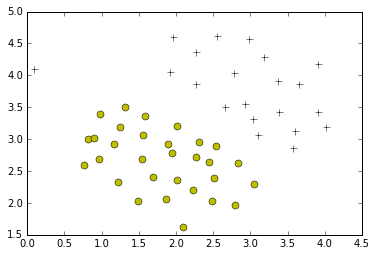

In [2]:
## =============== Part 1: Loading and Visualizing Data ================
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.
#

print 'Loading and Visualizing Data ...'

# Load from ex6data1: 
# You will have X, y in your environment
data = scipy.io.loadmat('ex6data1.mat')
X = data['X']
y = data['y'].flatten()

# Plot training data
plotData(X, y)

#raw_input("Program paused. Press Enter to continue...")


Training Linear SVM ...
C = 1


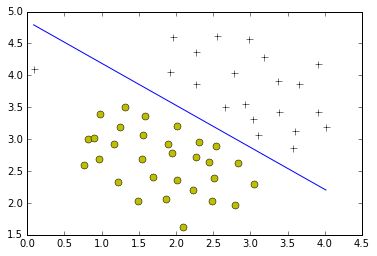

C = 3


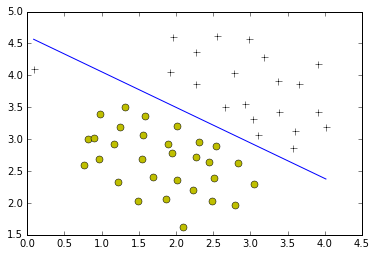

C = 10


/Users/Xin/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


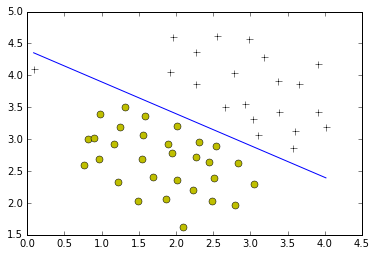

C = 30


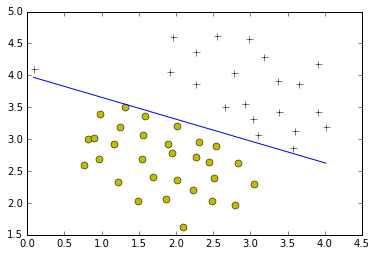

C = 100


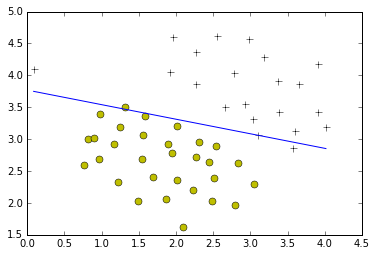

In [3]:
## ==================== Part 2: Training Linear SVM ====================
#  The following code will train a linear SVM on the dataset and plot the
#  decision boundary learned.
#

# Load from ex6data1:
# You will have X, y in your environment
data = scipy.io.loadmat('ex6data1.mat')
X = data['X']
y = data['y'].flatten()

print 'Training Linear SVM ...'

# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)

#C = 1
C_vec = [1, 3, 10, 30, 100]
for C in C_vec:
    clf = svm.SVC(C=C, kernel='linear', tol=1e-3, max_iter=100)
    model = clf.fit(X, y)
    print "C =", C
    visualizeBoundaryLinear(X, y, model)

#raw_input("Program paused. Press Enter to continue...")


In [4]:
## =============== Part 3: Implementing Gaussian Kernel ===============
#  You will now implement the Gaussian kernel to use
#  with the SVM. You should complete the code in gaussianKernel.m
#
print 'Evaluating the Gaussian Kernel ...'

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)
#
print 'Gaussian Kernel between x1 = [1 2 1], x2 = [0 4 -1], sigma = %0.5f : ' \
       '\t%f\n(this value should be about 0.324652)\n' % (sigma, sim)

#raw_input("Program paused. Press Enter to continue...")


Evaluating the Gaussian Kernel ...
Gaussian Kernel between x1 = [1 2 1], x2 = [0 4 -1], sigma = 2.00000 : 	0.324652
(this value should be about 0.324652)



Loading and Visualizing Data ...


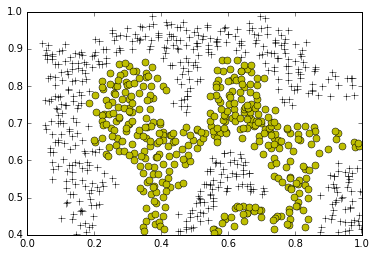

In [5]:
## =============== Part 4: Visualizing Dataset 2 ================
#  The following code will load the next dataset into your environment and
#  plot the data.
#

print 'Loading and Visualizing Data ...'

# Load from ex6data2:
# You will have X, y in your environment
data = scipy.io.loadmat('ex6data2.mat')
X = data['X']
y = data['y'].flatten()

# Plot training data
plotData(X, y)
show()
#raw_input("Program paused. Press Enter to continue...")

Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...


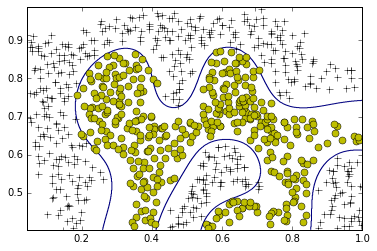

In [6]:
## ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
#  After you have implemented the kernel, we can now use it to train the
#  SVM classifier.
#
print 'Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...'

# Load from ex6data2:
# You will have X, y in your environment
data = scipy.io.loadmat('ex6data2.mat')
X = data['X']
y = data['y'].flatten()

# SVM Parameters
C = 1
sigma = 0.1
gamma = 1.0 / (2.0 * sigma ** 2)

# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to
# convergence.

clf = svm.SVC(C=C, kernel='rbf', tol=1e-3, max_iter=500, gamma=gamma)
model = clf.fit(X, y)
visualizeBoundary(X, y, model)

#raw_input("Program paused. Press Enter to continue...")

Loading and Visualizing Data ...


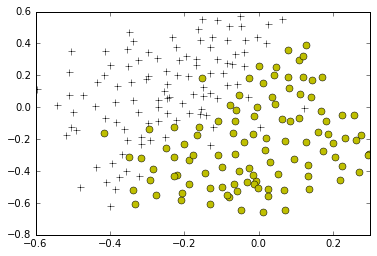

In [7]:
## =============== Part 6: Visualizing Dataset 3 ================
#  The following code will load the next dataset into your environment and
#  plot the data.
#

print 'Loading and Visualizing Data ...'

# Load from ex6data3:
# You will have X, y in your environment
data = scipy.io.loadmat('ex6data3.mat')
X = data['X']
y = data['y'].flatten()

# Plot training data
plotData(X, y)
show()
#raw_input("Program paused. Press Enter to continue...")

/Users/Xin/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Best C and sigma are: 1.0 0.1


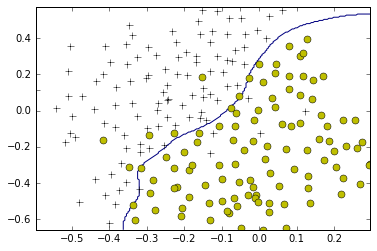

In [8]:
## ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

#  This is a different dataset that you can use to experiment with. Try
#  different values of C and sigma here.
#

# Load from ex6data3:
# You will have X, y in your environment
data = scipy.io.loadmat('ex6data3.mat')
Xval = data['Xval']
yval = data['yval'].flatten()

# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval)
print "Best C and sigma are:", C, sigma
gamma = 1.0 / (2.0 * sigma ** 2)
# Train the SVM

clf = svm.SVC(C=C, kernel='rbf', tol=1e-3, max_iter=500, gamma=gamma)
model = clf.fit(X, y)
visualizeBoundary(X, y, model)

#raw_input("Program paused. Press Enter to continue...")